# Anomaly Detection Using Negative Selection Algorithm

This notebook documents the process of using the Negative Selection Algorithm to detect anomalies in sequence data. The goal is to discriminate between English and Tagalog strings effectively. We'll be calculating the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) for different values of the parameter `r`, which influences the strictness of the anomaly detection.


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc as calculate_auc
import matplotlib.pyplot as plt

## Methodology

The methodology involves several steps:
1. Generating anomaly scores using the Negative Selection Algorithm implemented in Java.
2. Exporting these scores into text files for both English and Tagalog strings.
3. Labeling the scores with `0` for English and `1` for Tagalog.
4. Combining, sorting, and formatting the scores for AUC calculation.
5. Calculating the AUC and plotting the ROC curves using Python's scikit-learn library.

### Generating Anomaly Scores

The anomaly scores for both English and Tagalog datasets were generated using the Negative Selection Algorithm, executed with varying `r` values (from 1 to 9). The scores were outputted to text files for subsequent analysis. Below are the commands used for each `r` value, structured to enhance readability:

- **For English dataset**:
    ```bash
    java -jar negsel2.jar -self english.train -n 10 -r <r_value> -c -l < english.test > english_scores_r<r_value>.txt
    ```
- **For Tagalog dataset**:
    ```bash
    java -jar negsel2.jar -self english.train -n 10 -r <r_value> -c -l < tagalog.test > tagalog_scores_r<r_value>.txt
    ```

We replaced `<r_value>` with each value from 1 to 9 to generate the corresponding scores. For example, for `r=1`, replace `<r_value>` with `1` to get:

- **English scores for r=1**:
    ```bash
    java -jar negsel2.jar -self english.train -n 10 -r 1 -c -l < english.test > english_scores_r1.txt
    ```
- **Tagalog scores for r=1**:
    ```bash
    java -jar negsel2.jar -self english.train -n 10 -r 1 -c -l < tagalog.test > tagalog_scores_r1.txt
    ```

**Now, with the generated text files containing the scores for each r value and each language, we are ready to proceed with the analysis.**


### Labeling the scores with `0` for English and `1` for Tagalog.
Assign a label to each score, with `0` for scores coming from the english_scores file and `1` for those from the tagalog_scores file. This step is crucial because the AUC calculation requires knowledge of which class (English or Tagalog) each score is associated with.

In [2]:
# Read the score files into pandas dataframes
english_scores_r1 = pd.read_csv('english_scores_r1.txt', header=None, names=['Score'])
tagalog_scores_r1 = pd.read_csv('tagalog_scores_r1.txt', header=None, names=['Score'])

english_scores_r2 = pd.read_csv('english_scores_r2.txt', header=None, names=['Score'])
tagalog_scores_r2 = pd.read_csv('tagalog_scores_r2.txt', header=None, names=['Score'])

english_scores_r3 = pd.read_csv('english_scores_r3.txt', header=None, names=['Score'])
tagalog_scores_r3 = pd.read_csv('tagalog_scores_r3.txt', header=None, names=['Score'])

english_scores_r4 = pd.read_csv('english_scores_r4.txt', header=None, names=['Score'])
tagalog_scores_r4 = pd.read_csv('tagalog_scores_r4.txt', header=None, names=['Score'])

english_scores_r5 = pd.read_csv('english_scores_r5.txt', header=None, names=['Score'])
tagalog_scores_r5 = pd.read_csv('tagalog_scores_r5.txt', header=None, names=['Score'])

english_scores_r6 = pd.read_csv('english_scores_r6.txt', header=None, names=['Score'])
tagalog_scores_r6 = pd.read_csv('tagalog_scores_r6.txt', header=None, names=['Score'])

english_scores_r7 = pd.read_csv('english_scores_r7.txt', header=None, names=['Score'])
tagalog_scores_r7 = pd.read_csv('tagalog_scores_r7.txt', header=None, names=['Score'])

english_scores_r8 = pd.read_csv('english_scores_r8.txt', header=None, names=['Score'])
tagalog_scores_r8 = pd.read_csv('tagalog_scores_r8.txt', header=None, names=['Score'])

english_scores_r9 = pd.read_csv('english_scores_r9.txt', header=None, names=['Score'])
tagalog_scores_r9 = pd.read_csv('tagalog_scores_r9.txt', header=None, names=['Score'])

In [3]:
# Add labels to the scores (0 for English and 1 for Tagalog)
# Initialize an empty list to hold all dataframes
all_scores = []

# Loop through r values from 1 to 9
for r in range(1, 10):
    # Dynamically access the corresponding dataframes
    english_scores = globals()[f'english_scores_r{r}']
    tagalog_scores = globals()[f'tagalog_scores_r{r}']
    
    # Add labels
    english_scores['Label'] = 0
    tagalog_scores['Label'] = 1
    
    # Combine and append to the list
    all_scores.append(pd.concat([english_scores, tagalog_scores], ignore_index=True))

### Combining, sorting, and formatting the scores for AUC calculation.
Once labeled, we combined the scores for each r value and sorted the combined data by the anomaly scores in preparation for the ROC and AUC analysis. Sorting is crucial because the ROC curve plots true positive rates versus false positive rates at various threshold settings, which are determined by these anomaly scores.

In [4]:
# Initialize a dictionary to store AUC values for each r
auc_values = {}

# Loop through r values from 1 to 9
for r in range(1, 10):
    # Combine English and Tagalog scores into a single dataframe for each r value
    combined_scores = pd.concat([globals()[f'english_scores_r{r}'], globals()[f'tagalog_scores_r{r}']], ignore_index=True)
    
    # Sort the combined data by the anomaly scores
    sorted_scores = combined_scores.sort_values(by='Score', ascending=False).reset_index(drop=True)
    
    # Calculate and store the AUC for each r value
    auc_values[r] = roc_auc_score(sorted_scores['Label'], sorted_scores['Score'])

# Print AUC values to check
for r, auc in auc_values.items():
    print(f"AUC for r={r}: {auc}")

AUC for r=1: 0.5435347184253692
AUC for r=2: 0.7396459814106069
AUC for r=3: 0.8311235647895024
AUC for r=4: 0.7916097138691454
AUC for r=5: 0.7282440313468198
AUC for r=6: 0.6680847913249499
AUC for r=7: 0.5907258064516129
AUC for r=8: 0.5201612903225806
AUC for r=9: 0.5120967741935484


### Plotting ROC curve

In [5]:
# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, r, roc_auc):
    plt.figure(figsize=(10, 8))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1 - Specificity')
    plt.ylabel('Sensitivity')
    plt.title(f'Receiver Operating Characteristic for r={r}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

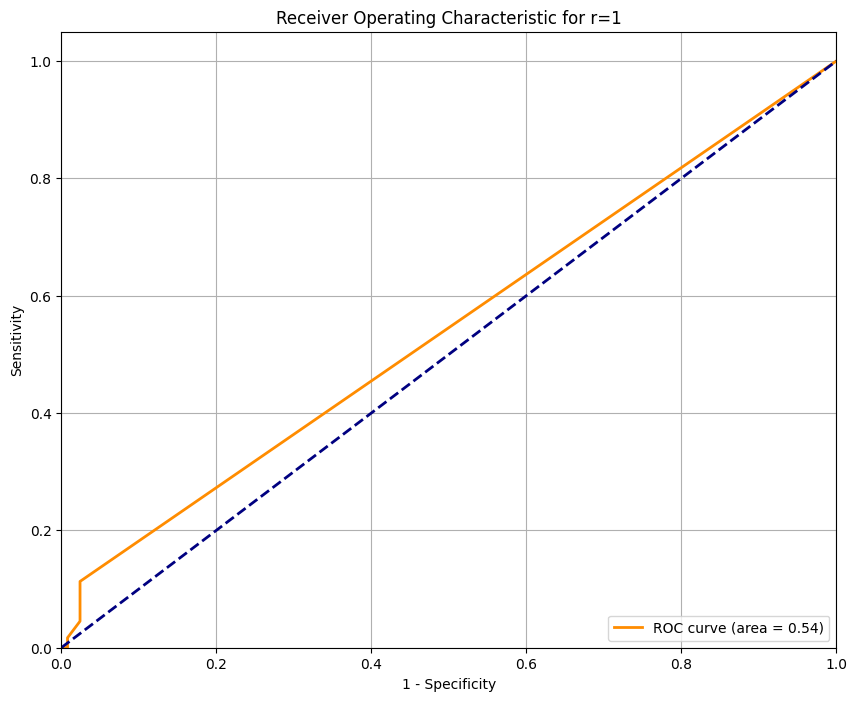

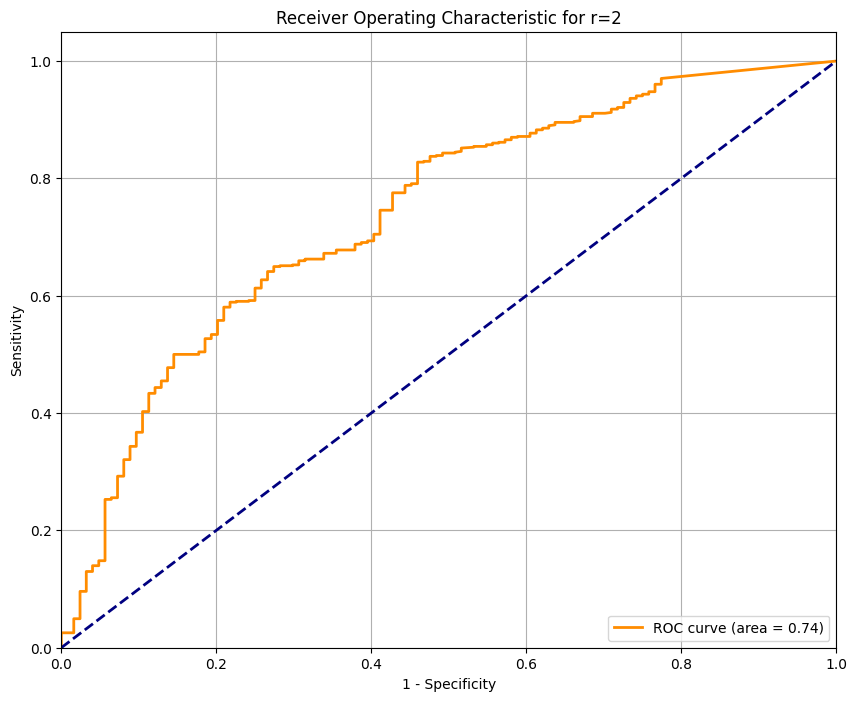

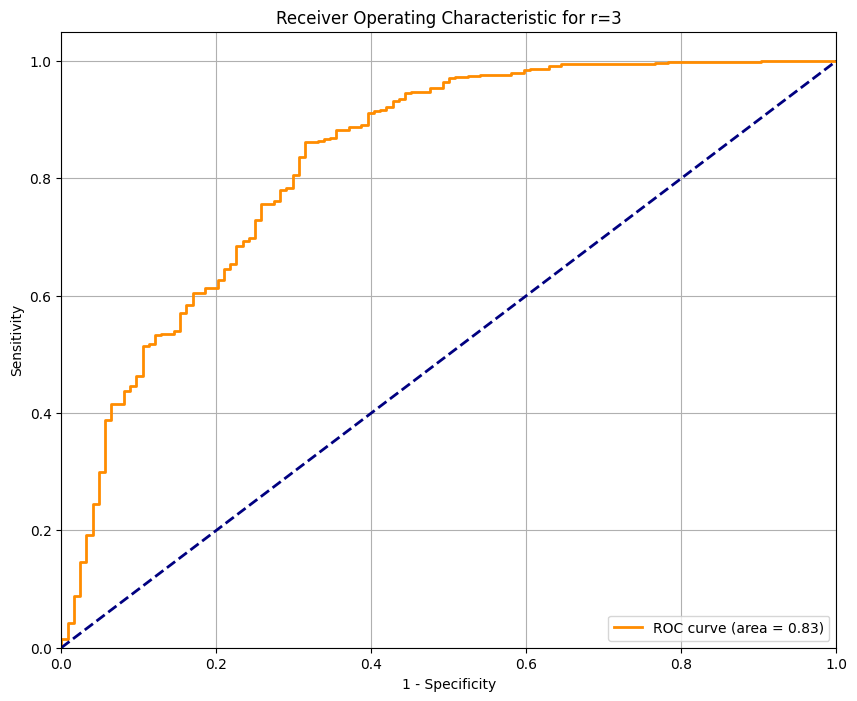

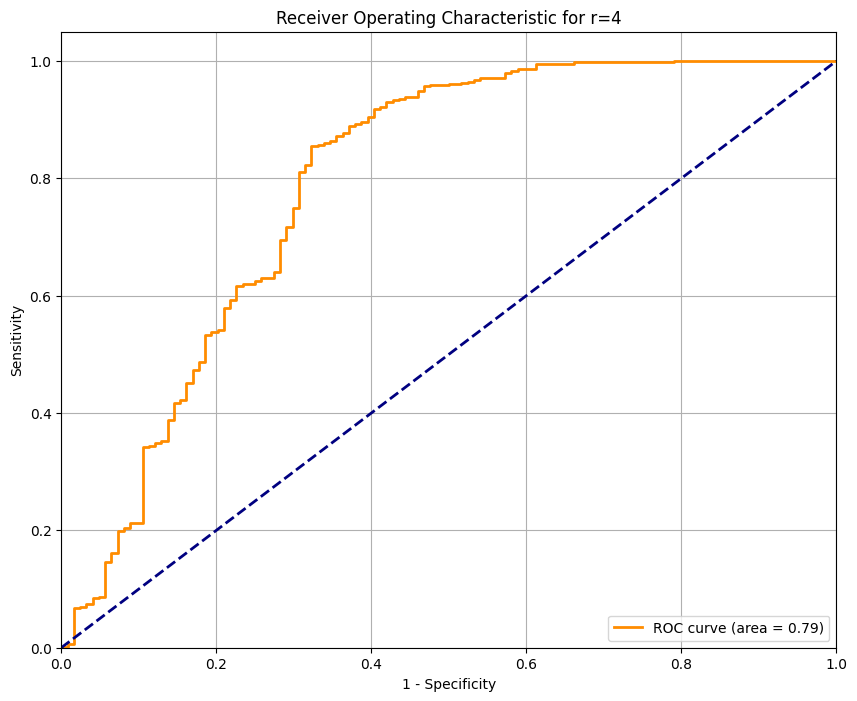

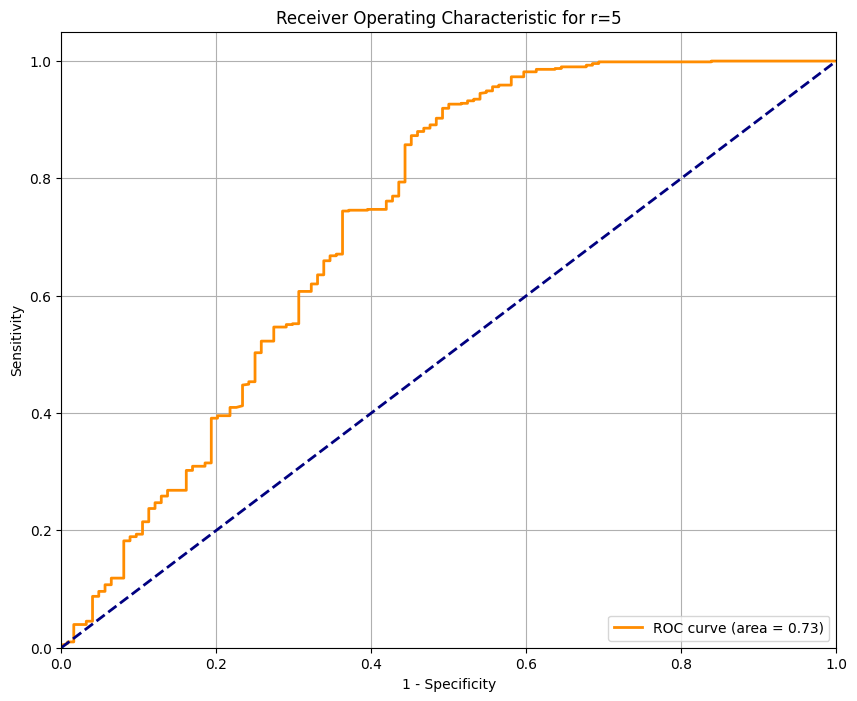

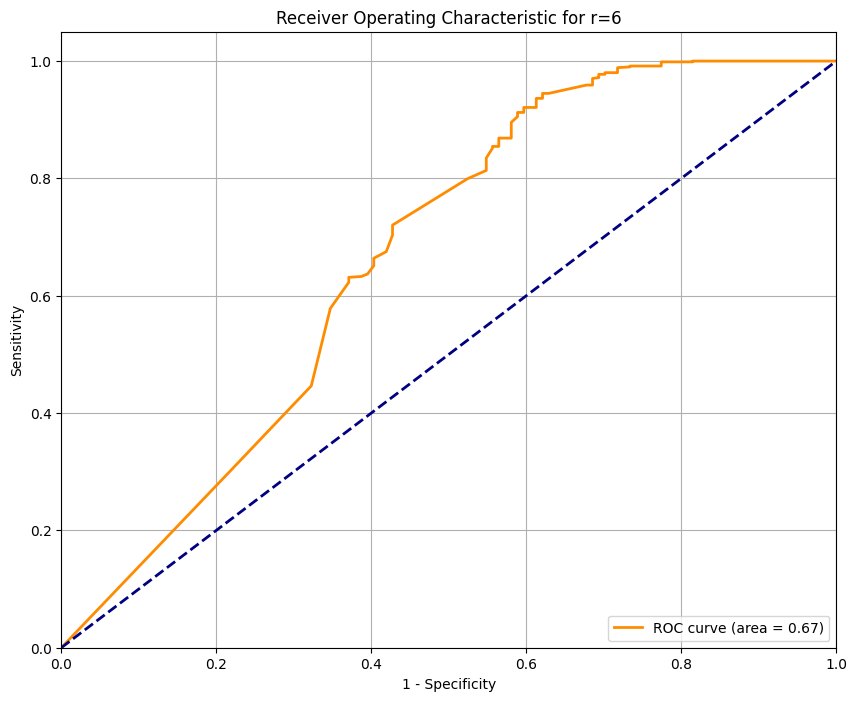

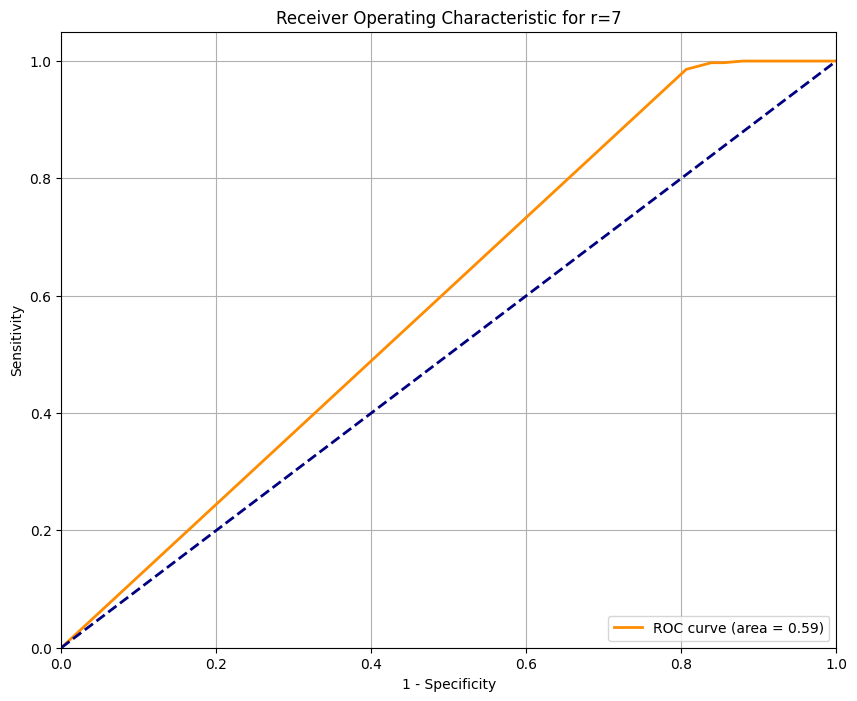

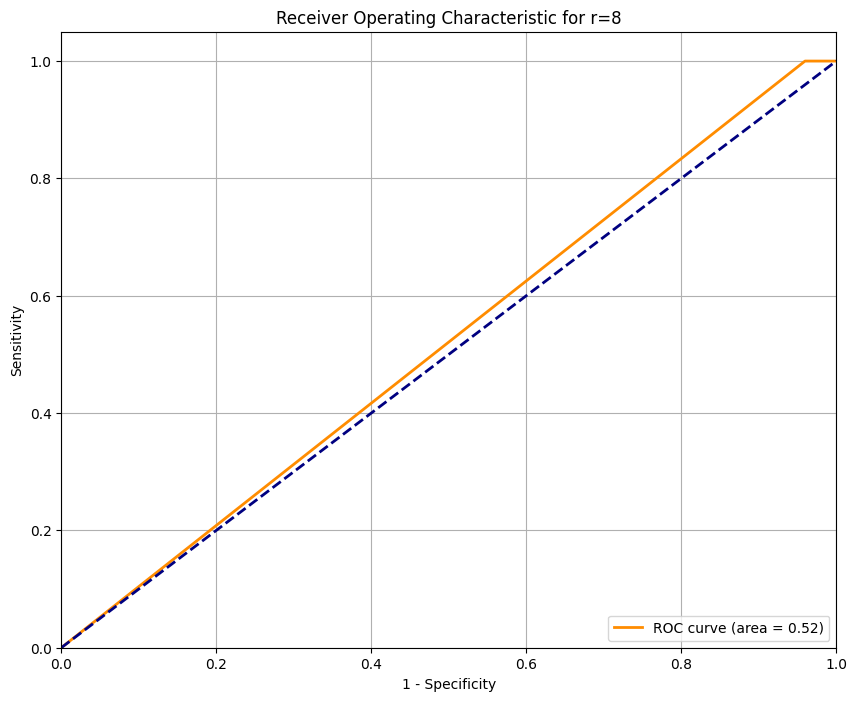

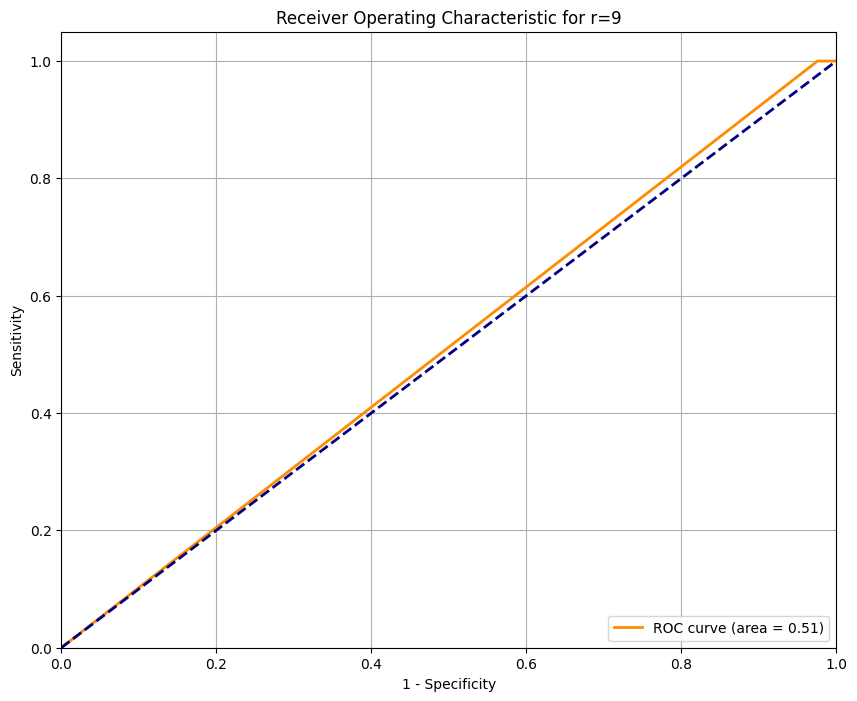

In [6]:
# Loop through r values from 1 to 9 to plot ROC curve for each
for r in range(1, 10):
    # Retrieve the combined and sorted scores for the current r value
    combined_scores = all_scores[r-1]  # Adjusting index for 0-based indexing in Python lists
    fpr, tpr, thresholds = roc_curve(combined_scores['Label'], combined_scores['Score'])
    roc_auc = calculate_auc(fpr, tpr)  # Use the renamed function
    
    # Plot the ROC curve
    plot_roc_curve(fpr, tpr, r, roc_auc)